## Import Libraries

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://www.h5py.org) is a library that includes tools for data preprocessing, modeling, evaluation, and more.

- [nltk](https://pypi.org/project/nltk/): The Natural Language Toolkit, used for various natural language processing tasks such as tokenization and stemming.

- stopwords, word_tokenize, PorterStemmer: Tools from NLTK for handling natural language tasks, including stopword removal, tokenization, and stemming.

- [pandas](https://pypi.org/project/pandas/): A powerful library for data manipulation and analysis, providing data structures like DataFrames.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): A function from scikit-learn to split datasets into training and testing sets for model evaluation.

- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Converts a collection of text documents to a matrix of token counts, a common step in text processing.

- [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html): Generates learning curves, which visualize how a model's performance changes with training set size.

- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): Converts a collection of raw documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.

- f1_score: A metric for assessing a model's accuracy, particularly used in classification tasks.

- accuracy_score: Measures the accuracy of a classification model by comparing predicted and actual labels.



In [1]:
# importing libraries needed fot this assignment 
# to install sklearn: pip install scikit-learn
# to install nltk: pip install nltk
import nltk
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 

## Load the Data

Run the below cell to load your `Tweets.csv` Dataset
The dataset named 'Tweets.csv' is loaded into the DataFrame `df` using `pd.read_csv`. The dataset contains two columns `'airline_sentiment'` (indicating the sentiment of the tweet) and `'text'` (containing the actual tweet content).

In [2]:
df = pd.read_csv('Tweets.csv', encoding='latin')
df.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


## Split the data into train (60%), validation (20%) and test (20%)

In the below code, you should split your dataset into 60% training, 20% validation, and 20% testing

The data will be divided into the following subsets:

* `60% Training Data`: This subset is designated for training your model. 

* `20% Validation Data`: This subset is crucial for parameter tuning. Use it to fine-tune your model's parameters and optimize its performance.

* `20% Testing Data`: Reserve this portion for testing your model with the best-tuned parameters. It serves as an unbiased evaluation to assess the model's generalization on unseen data.



In [3]:
#splitting training set and testing set to 80%, 20%

###### YOUR CODE STARTS HERE ##### (~ approx 1 line of code)
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['airline_sentiment'], test_size = 0.2)
###### YOUR CODE ENDS HERE #####

# training set is 80% now, we split the training and validation where each should be 60% and 20% respectively
# i.e. validation data is 1/4 the training data which is equivalent to 25% of it

###### YOUR CODE STARTS HERE ##### (~ approx 1 line of code)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)
###### YOUR CODE ENDS HERE #####


print (f"Number of training examples: {len(X_train)}")
print (f"Number of testing examples: {len(X_test)}")
print (f"Number of validating examples: {len(X_val)}")

Number of training examples: 8784
Number of testing examples: 2928
Number of validating examples: 2928


**Expected Output for X_train, X_test and X_val**: 
<table style="width:15%">
  <tr>
    <td>**X_train**</td>
    <td> 8784 </td> 
  </tr>
  
  <tr>
    <td>**X_test**</td>
    <td> 2928 </td> 
  </tr>
  
  <tr>
    <td>**X_val**</td>
    <td> 2928 </td> 
  </tr>
  
</table>


In [4]:
assert len(X_train) == 8784
assert len(X_test) == 2928
assert len(X_val) == 2928

print("\nYour values are correct! Continue with the rest of your code.")


Your values are correct! Continue with the rest of your code.


## Linear Regression Classifier on Binary Features

#### Text Classification with CountVectorizer and RidgeClassifier

In this part , you will implement text classification using `CountVectorizer` for feature extraction and `RidgeClassifier` as a linear regression model.

`BinaryVectorizer` is a special case of the `CountVectorizer` in `scikit-learn`. In this configuration, the presence of each term is encoded as 1, and its absence as 0. This is beneficial when the focus is solely on determining whether a term is present or not, without considering its frequency.

Example: 
```python
from sklearn.feature_extraction.text import CountVectorizer

# Create BinaryVectorizer
BinaryVectorizer = CountVectorizer(binary=True)

# Example data
corpus = ['This is an example document.',
          'Another document for illustration.',
          'This document is a binary example.']

# Fit and transform with BinaryVectorizer
X_binary = BinaryVectorizer.fit_transform(corpus)
```
The resulting binary feature matrix for the given example data would look like this:

$$ \begin{bmatrix}
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 & 1 & 1 & 1 \\
\end{bmatrix}$$



To create your binary features, check the documentation provided in sklearn: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html "> `Count Vectorizer`</a>


For Linear Regression Classifier, you can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html"> `Ridge Classifier`</a>


In [5]:
###  YOUR CODE STARTS HERE ### (≈ approx 3 lines of code)

# create binary features 
BinaryVectorizer= CountVectorizer(binary=True)

# fit and transform train data
X_train_vectorized = BinaryVectorizer.fit_transform(X_train)

# create your RidgeClassifier model
from sklearn.linear_model import RidgeClassifier
reg = RidgeClassifier()

print (f"BinaryVectorizer instance: {(BinaryVectorizer)}")

### YOUR CODE ENDS HERE ###

BinaryVectorizer instance: CountVectorizer(binary=True)


**Expected Output for BinaryVectorizer Instance**: 
<table style="width:50%">
  <tr>
    <td>**BinaryVectorizer instance: **</td>
    <td> CountVectorizer(binary=True) </td> 
  </tr>
  
</table>


In [6]:
assert X_train_vectorized.shape[0] == len(X_train), "Mismatch in the number of examples"
assert BinaryVectorizer.binary, "Binary feature should be True"

print("Your code executed successfully! Continue with the rest of your code.")

Your code executed successfully! Continue with the rest of your code.


## Learning Curve

Plot the learning curve and diagnose whether you suffer from high bias or high variance, neither or both.

**Function: `plot_learning_curve`**

This function is designed to generate and plot a learning curve for a machine learning model using the `learning_curve` function from scikit-learn. A learning curve provides insights into the performance of a model as the size of the training set increases.

**Parameters:**
- `estimator`: The machine learning model or algorithm for which the learning curve is to be plotted.
- `X`: The feature matrix of the dataset.
- `y`: The target labels of the dataset.
- `title`: The title for the learning curve plot.

**Returns:**
- The function generates and displays a learning curve plot.

**Steps:**
1. **Learning Curve Calculation:**
   - The `learning_curve` function is utilized to compute the training and validation scores across varying training set sizes. 

2. **Data Processing:**
   - The mean and standard deviation of the training scores, validation scores, and fit times are calculated.

3. **Learning Curve Plotting:**
   - The function plots the learning curve with the training set size on the x-axis and the model performance (in terms of error rate) on the y-axis.
   - Two curves are plotted: one for the training set (`Ein`) and another for the validation set (`Eval`).
   - The color coding distinguishes the curves, with red representing the validation set and green representing the training set.
   - The legend is added to identify the curves, and the plot is displayed.

**Usage:**
- To utilize this function, pass your machine learning model (`estimator`), feature matrix (`X`), target labels (`y`), and a descriptive title (`title`) for the learning curve.

**Example:**
```python
# Assuming 'model' is your machine learning model and 'X_train', 'y_train' are your training data
plot_learning_curve(model, X_train, y_train, "Learning Curve for My Model")


In [7]:
def plot_learning_curve(estimator, X, y, title):
    '''check scikit-learn documentation'''
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.plot(train_sizes, 1 - test_scores_mean, 'o-', color="r",
                 label="Eval")
    plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="g",
                 label="Ein")
    plt.legend(loc="best")
    plt.title(title)
    
    plt.show()

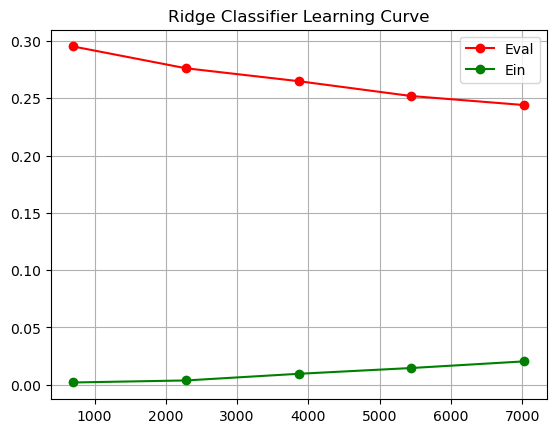

In [8]:
#call the plot function 
#pass the RidgeClassifier model, binary features of the trianed data,
#trained labels and a title for the graph as parameters

### YOUR CODE STARTS HERE ### (≈ 1 lines of code)
plot_learning_curve(estimator = reg, X = X_train_vectorized, y = Y_train, title = "Ridge Classifier Learning Curve")
###  YOUR CODE ENDS HERE ###

### Does your model exhibit signs of overfitting, underfitting, both, or neither when analyzing the learning curve? Provide a detailed explanation to support your assessment.
###### <span style='color:green'> YOUR EXPLANATION STARTS HERE </span>
The model suffers from overfitting.
We can observe that there is a big gap between the training and validation curves and this gap persists for all given training data sizes. 
In addition, the model suffers from overfitting and high variance, since the training curve is much lower than the validation one. The training error is very small at the beginning, and as we increase the amount of training data, the training error increases and the validation error decreases (Eval curve doesn't flatten).
So, since the validation curve is higher than the training curve and is decreasing slowly as the size of the training set increases; this shows that even if the model has learnt the training set well and performs well on it; it is not generalizing well to unseen or new data and thus will perform poorly when used on real data. 

## Linear Regression Classifier on tf-idf

### Pre-process the Data

Run the below code snippet which removes stop words and applies stemming using the PorterStemmer from NLTK.

- **NLTK Downloads:**
  - `nltk.download('stopwords')`: Downloads the set of stop words in English.
  - `nltk.download('punkt')`: Downloads the Punkt tokenizer model for tokenization.

- **Preprocessing Function:**
  - The function `preprocess(X)` takes a list of sentences `X` as input and performs the following steps:
    1. Initializes a `PorterStemmer` (`ps`) for stemming and creates a set of English stop words.
    2. Iterates through each sentence in `X` and tokenizes it using NLTK's `word_tokenize`.
    3. Removes stop words and applies stemming to each word in the sentence.
    4. Constructs a preprocessed sentence by concatenating the stemmed words.
    5. Appends the preprocessed sentence to `X_preprocessed`.

- **Preprocess Xtrain, Xval, and Xtest:**
  - The code calls the `preprocess` function on the training (`X_train`), validation (`X_val`), and test (`X_test`) datasets to obtain preprocessed versions:
    - `X_train_preprocessed`
    - `X_val_preprocessed`
    - `X_test_preprocessed`

The resulting preprocessed datasets are expected to be used in the following tasks in the next parts of this assignment

In [9]:
!pip install nltk

In [11]:
# removing stop words and stemming using PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
def preprocess(X):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    X_preprocessed = []
    for sentence in X:
        preprocessed_sentence = ''
        word_tokens = word_tokenize(sentence) 
        for word in word_tokens:
            if not word in stop_words: 
                preprocessed_sentence += ps.stem(word) + ' '
        
        X_preprocessed.append(preprocessed_sentence)

    return X_preprocessed



### YOUR CODE STARTS HERE ### (~ approx 3 lines)
X_train_preprocessed = preprocess(X_train)
X_val_preprocessed   = preprocess(X_val)
X_test_preprocessed  = preprocess(X_test)


print (f"Number of training examples: {len(X_train_preprocessed)}")
print (f"Number of testing examples: {len(X_test_preprocessed)}")
print (f"Number of validating examples: {len(X_val_preprocessed)}")

### YOUR CODE EXPLANATION STARTS HERE ###
#The Stop words removal are words that don't add something to a sentence (For example: the, and)
#Stemming means take a word back to its root and origin 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of training examples: 8784
Number of testing examples: 2928
Number of validating examples: 2928


**Expected Output for X_train_preprocessed, X_test_preprocessed and X_val_preprocessed**: 
<table style="width:25%">
  <tr>
    <td>**X_train_preprocessed**</td>
    <td> 8784 </td> 
  </tr>
  
  <tr>
    <td>**X_test_preprocessed**</td>
    <td> 2928 </td> 
  </tr>
  
  <tr>
    <td>**X_val_preprocessed**</td>
    <td> 2928 </td> 
  </tr>
  
</table>


### TF-IDF Weighting


In this part , you will implement text classification using `TF-IDF Vectorizer` for feature extraction and `RidgeClassifier` as a linear regression model.

TF-IDF (Term Frequency-Inverse Document Frequency):

1. Term Frequency (TF):

Term Frequency represents how often a term (word) occurs in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document. 
<br/> 
<br/>
$$ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} \$$


2. Inverse Document Frequency (IDF): Inverse Document Frequency measures the importance of a term across a collection of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.
<br/> 
<br/>
$$\text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents in the collection } D}{\text{Number of documents containing term } t}\right) \ $$

3. TF-IDF Calculation: TF-IDF is the product of TF and IDF. It reflects the importance of a term in a specific document relative to its importance across all documents.

$$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) 
$$

In this part of the assignment, the `TfidfVectorizer` is imported from `scikit-learn` to transform the text data into a TF-IDF feature matrix.

The resulting TF-IDF matrix is then used as input to the `RidgeClassifier`, a linear regression model, for text classification.

The combination of TF-IDF vectorization and a linear regression model allows the algorithm to learn the patterns in the text data and make predictions based on those patterns.

Here's an example in Python: 

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer
TfidfVectorizer = TfidfVectorizer()

# Example data
corpus = ['This is a positive example.',
          'Another positive document.',
          'This document is negative.']

# Fit and transform with TF-IDF Vectorizer
X_tfidf = TfidfVectorizer.fit_transform(corpus)
```
The resulting TF-IDF feature matrix for the given example data would look like this: 

$$ \begin{bmatrix}
0.57 & 0.57 & 0.57 & 0.40 & 0.00 & 0.00 & 0.00 & 0.00 \\
0.00 & 0.00 & 0.57 & 0.57 & 0.57 & 0.00 & 0.00 & 0.00 \\
0.47 & 0.47 & 0.47 & 0.33 & 0.33 & 0.47 & 0.47 & 0.47 \\
\end{bmatrix} $$

Each row corresponds to a document, and each column corresponds to a unique term in the corpus. The values in the matrix represent the TF-IDF scores, reflecting the importance of each term in each document relative to the entire corpus.




In the below code, you should follow these steps:
1. **Create TF-IDF Vectorizer:**
Initialize a TF-IDF vectorizer, such as `TfidfVectorizer`, to convert text data into a matrix of TF-IDF features.
2. **Fit and Transform Training Data:**
Fit the TF-IDF Vectorizer on the preprocessed training data `X_train_preprocessed` to learn the vocabulary and transform it into a TF-IDF feature matrix.
3. **Transform Test Data**:
Use the pre-fitted TF-IDF Vectorizer to transform the preprocessed testing data `X_test_preprocessed` into a corresponding TF-IDF feature matrix.
4. **Transform Validation Data:**
Similarly, apply the pre-fitted TF-IDF Vectorizer to transform the validation data `X_val_preprocessed` into a TF-IDF feature matrix.


For more info about TFIDF, check the documentation of <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">`Tfidf Vectorizer`</a>

In [12]:
### YOUR CODE STARTS HERE ### (≈ approx 4 lines of code)

# create your TFID vectorize 
FreqVectorizer = TfidfVectorizer()
# fit and transform the training data
X_train_freq= FreqVectorizer.fit_transform(X_train_preprocessed)
vocab_size_train = len(FreqVectorizer.vocabulary_)
print(f"Train Vocabulary size: {vocab_size_train}")

# transform X_test 
X_test_freq= FreqVectorizer.transform(X_test_preprocessed)
# transform X_val
X_val_freq= FreqVectorizer.transform(X_val_preprocessed)
### YOUR CODE ENDS HERE ###

Train Vocabulary size: 9460


**Expected Output for vocab_size_train**: 
<table style="width:30%">
  <tr>
    <td>**Train Vocabulary size:**</td>
    <td> 9389 </td> 
  </tr>

  
</table>

In [13]:
assert isinstance(FreqVectorizer, TfidfVectorizer), "FreqVectorizer is not an instance of TfidfVectorizer"

print(f"TF-IDF Vectorizer: {FreqVectorizer}")


# Assert that fit_transform was applied to the training set
assert X_train_freq.shape[1] == vocab_size_train, "fit_transform was not applied to the training set"

# Assert that transform was applied to the validation set
assert X_val_freq.shape[1] == vocab_size_train, "transform was not applied consistently to the validation set"

# Assert that transform was applied to the test set
assert X_test_freq.shape[1] == vocab_size_train, "transform was not applied consistently to the test set"

# Print confirmation if assertions pass
print("Fit and transform assertions passed successfully.")

TF-IDF Vectorizer: TfidfVectorizer()
Fit and transform assertions passed successfully.


### Train the model

Train a linear regression using the tf-idf weights and use an $L_2$ regularizer. You should set the regularization parameter using the validation set. 
<br> 
Note: `alpha` parameter is used for L2 regularization in <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html"> Ridge Classifier</a>

In the context of the Ridge Classifier in scikit-learn, the regularization parameter is denoted as `alpha`. The higher the `alpha`, the stronger the regularization. It's used to control the balance between fitting the training data well and keeping the weights small to avoid overfitting.

$L_2$ regularization in linear regression adds a penalty for large weights, controlled by the regularization parameter $\lambda$ (in scikit-learn, `alpha`). The regularization parameter is typically tuned using a validation set to find the optimal balance between fitting the training data and preventing overfitting.



In [13]:
lbds = [0.001, 0.01, 0.1, 1, 10,  100]

### YOUR CODE STARTS HERE ### (≈ approx 5 lines of code)
for lbd in lbds:
    # Create your regression model here, e.g., RidgeClassifier
    reg = RidgeClassifier(alpha=lbd)
    
    # Use the produced features from the previous cell and corresponding labels training set

    reg.fit(X_train_freq, Y_train)
    # predict using the validation features created in the previous cell
    y_pred = reg.predict(X_val_freq)
    
    # measure the accuracy and f1 using y_pred and val labels 
    f1 = f1_score(Y_val, y_pred, average = 'micro')
    accuracy = accuracy_score(Y_val, y_pred)
    print("Lambda {}:\taccuracy: {:.2f}%\tF1-score:{:.2f}%".format(lbd, accuracy*100, f1*100))
### YOUR CODE ENDS HERE ### (≈ approx 4 lines of code)

Lambda 0.001:	accuracy: 68.65%	F1-score:68.65%
Lambda 0.01:	accuracy: 70.73%	F1-score:70.73%
Lambda 0.1:	accuracy: 76.13%	F1-score:76.13%
Lambda 1:	accuracy: 78.93%	F1-score:78.93%
Lambda 10:	accuracy: 75.34%	F1-score:75.34%
Lambda 100:	accuracy: 65.98%	F1-score:65.98%


**Expected Output for Lambda, accuracy, F1-score**: 
<table style="width:50%">
  <tr>
    <th>Lambda</th>
    <th>Accuracy</th>
    <th>F1-score</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>64.38%</td>
    <td>64.38%</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>68.14%</td>
    <td>68.14%</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>73.80%</td>
    <td>73.80%</td>
  </tr>
  <tr>
    <td>1</td>
    <td>77.63%</td>
    <td>77.63%</td>
  </tr>
  <tr>
    <td>10</td>
    <td>74.83%</td>
    <td>74.83%</td>
  </tr>
  <tr>
    <td>100</td>
    <td>65.81%</td>
    <td>65.81%</td>
  </tr>
</table>


Please be aware that while your accuracy and F1 score may not precisely match the provided expected output, they should fall within a range of the expected values, allowing for a deviation of approximately ±10%.

## Model Selection and Testing

Choose your best model out of all the models you tried and then evaluate the selected model on the test data. You should report the accuracy of the selected model and its F-measure.

In [14]:
# Train your best model, i.e., the model with the highest accuracy reported before
# Report the model's accuracy and F-measure

### YOUR CODE STARTS HERE ### (≈ 7 lines of code)

# Assign the best regularization parameter identified earlier
best_lbd = 1

# Instantiate the regression model (RidgeClassifier) with the best lambda value 
# and train it on the entire training set.
# Use appropriate features tfidf training set and labels (Y_train) here

reg = RidgeClassifier(alpha = best_lbd)
reg.fit(X_train_freq, Y_train)

# Make Predictions and Calculate F-measure:
# Make predictions on the test set and calculate the F-measure.
y_pred = reg.predict(X_test_freq)
test_f1 = f1_score(Y_test, y_pred, average = 'micro')
# Evaluate the Model on the Test Set:
# Test the trained model on the test set and calculate its accuracy.
# Use appropriate features tfidf testing set and labels (Y_test) here
test_accuracy = accuracy_score(Y_test, y_pred)
print("Lambda 1:\taccuracy: {:.2f}%\tF1-score:{:.2f}%".format(test_accuracy*100, test_f1*100))

### YOUR CODE ENDS HERE ###

Lambda 1:	accuracy: 78.48%	F1-score:78.48%


**Expected Output for Your best Lambda, accuracy, F1-score**: 
<table style="width:50%">
  <tr>
    <th>Lambda</th>
    <th>Accuracy</th>
    <th>F1-score</th>
  </tr>
   <tr>
    <td>**YOUR BEST LAMBDA**</td>
    <td>78.79%</td>
    <td>78.79%</td>
  </tr>
</table>

Please be aware that while your accuracy and F1 score may not precisely match the provided expected output, they should fall within a range of the expected values, allowing for a deviation of approximately ±10%.